In [3]:
# 강의 자료 ROC곡선에 x축 1-specificity임 고치기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Confusion matrix & metrics

In [5]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## (1) 데이터 준비

In [6]:
# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

In [7]:
model = LogisticRegression().fit(X,y)

y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
y

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [9]:
y_score

array([-4.06813887,  3.6965898 ,  2.26893258, -1.91365634,  2.56522372,
        2.61151531,  2.63496836, -1.94108775, -1.07724742, -5.4398401 ,
        3.05789898, -4.15723046, -2.98110006, -2.48847791, -1.69292996,
       -2.17019824,  2.28181226, -0.77949669, -4.6563474 ,  6.25403434,
        0.32759534, -1.56266812, -5.8805768 ,  0.97070331, -2.84440557,
       -4.90944589, -1.29283603, -0.50352102,  2.71851295,  0.84695412,
        0.87491539, -2.34865187, -0.27430019, -0.26196204, -4.26661455,
        2.12137234, -2.56256163, -2.21576518, -2.14056968, -2.61037352,
        2.43504684, -2.04561439,  1.1315499 ,  2.1818457 , -2.43383999,
        1.78437805, -0.22493199, -3.08193877,  2.41595683,  1.30928757,
        1.7677459 ,  2.13107267,  2.79943075, -3.15435232, -0.85074777,
       -3.74981649,  3.56099728, -6.8537731 , -6.18848853,  4.34998675,
       -5.56033274,  4.08077064, -3.00666939, -5.08174884,  0.87981447,
        2.99595201,  2.36712193,  2.68598412,  0.80547853,  2.55

In [10]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [11]:
# 데이터프레임 형태로 확인해 보자

df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)

In [12]:
display(df.head(), df.tail())

y_score  y_pred    y
0  6.254034     1.0  1.0
1  4.507575     1.0  1.0
2  4.349987     1.0  1.0
3  4.080771     1.0  1.0
4  3.696590     1.0  1.0

y_score  y_pred    y
95 -5.439840     0.0  0.0
96 -5.560333     0.0  0.0
97 -5.880577     0.0  0.0
98 -6.188489     0.0  0.0
99 -6.853773     0.0  0.0

## (2) confusion matrix 생성

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [14]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[49  3]
 [ 3 45]]


In [15]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  0.94
precision score:  0.9375
recall score:  0.9375
f1 score:  0.9375


In [16]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.94      0.94      0.94        48

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [17]:
# 로지스틱 회귀의 threshold(임계값) 를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)


In [18]:
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

y_score  y_hat    y
57 -1.562668    1.0  0.0
58 -1.692930    1.0  0.0
59 -1.913656    1.0  0.0
60 -1.941088    1.0  0.0
61 -2.045614    0.0  1.0
62 -2.140570    0.0  0.0
63 -2.170198    0.0  0.0
64 -2.207681    0.0  0.0
65 -2.215765    0.0  0.0
66 -2.348652    0.0  0.0
67 -2.433840    0.0  0.0
68 -2.488478    0.0  0.0

In [19]:
print(confusion_matrix(y, lower_threshold))

[[38 14]
 [ 1 47]]


In [20]:
print(classification_report(y, lower_threshold))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84        52
           1       0.77      0.98      0.86        48

    accuracy                           0.85       100
   macro avg       0.87      0.85      0.85       100
weighted avg       0.88      0.85      0.85       100



# 2. ROC, PR 곡선 그리기

In [21]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [22]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0) ## 새로운 데이터셋 생성
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
model = LogisticRegression().fit(X,y)
y_score = model.fit(X_train, y_train).decision_function(X_test)
y_pred = model.fit(X_train, y_train).predict(X_test)

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# calculate AUC
roc_auc = roc_auc_score(y_test, y_score) ## 
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [25]:
print(roc_auc)

0.9387179487179487


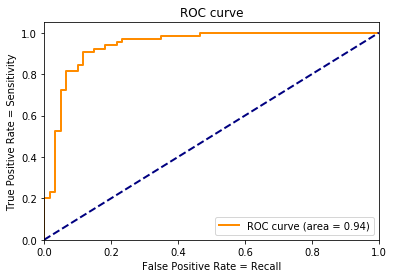

In [26]:
plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [108]:
print(confusion_matrix(y_test, y_pred))

[[57  5]
 [ 4 59]]


# 3. Cross Validation

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
cv = KFold(n_splits=3, shuffle=True, random_state=0) ## 3개의 부분집합으로 나뉘게끔 함

for train_index, test_index in cv.split(X):
    print(X[train_index], y[test_index])
    
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[ 1.98297046 -0.15733801]
 [ 1.03069172 -0.81935765]
 [ 0.48394883 -0.26817048]
 [-0.46762994 -0.75767607]
 [-1.13600951 -1.0418252 ]
 [-0.6100133  -0.65192718]
 [ 2.08123642  0.68287268]
 [-1.6008354   1.7408691 ]
 [ 1.54167873 -0.16441171]
 [-1.2743901  -1.18798668]
 [-3.72545789  3.07990696]
 [ 0.11628581  1.42140187]
 [ 1.03918667 -0.39450006]
 [-2.02217035 -1.74865191]
 [ 0.77900783 -1.46892914]
 [ 0.79733899 -1.63741576]
 [ 0.86934545 -0.76986296]
 [-1.52603176 -1.16436065]
 [-1.0754202   1.24060151]
 [ 0.9011158  -0.76226545]
 [ 0.0983004  -1.72943732]
 [ 0.98918371 -0.59336928]
 [ 0.49325757  1.70806011]
 [-1.92628935 -1.8402202 ]
 [ 1.53783784 -0.27135355]
 [-1.25830578 -1.14530909]
 [-0.06938574 -0.24445325]
 [-0.43857111  0.58575921]
 [ 1.35020475  0.9463027 ]
 [ 1.18290869  1.03417642]
 [ 1.03901319 -1.88454416]
 [ 1.49824313  0.47300839]
 [-1.3133433   1.86198279]
 [ 1.43418191  0.60347657]
 [ 1.30279538 -1.14021159]
 [-0.05112777 -0.6116075 ]
 [ 0.67888257  1.57523809]
 

In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션

In [33]:
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)  # cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

array([0.87, 0.88, 0.88, 0.84, 0.82])

In [34]:
scores = cross_val_score(LogisticRegression(), X, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.8742515 , 0.83233533, 0.88554217])

In [35]:
scores = cross_val_score(LogisticRegression(), X, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\skl

array([0.87128713, 0.86      , 0.84      , 0.82      , 0.8989899 ])

In [36]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.858055405540554

0.0007257408519529832

# 4. Grid Search

In [116]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [117]:
iris_data = load_iris()

In [118]:
X_train, X_test, y_train,y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2, random_state = 121)

In [119]:
dtree = DecisionTreeClassifier()

In [120]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [121]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [122]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\de

In [124]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.700000                5   
1  {'max_depth': 1, 'min_samples_split': 3}         0.700000                5   
2  {'max_depth': 2, 'min_samples_split': 2}         0.958333                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.958333                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.975000                1   
5  {'max_depth': 3, 'min_samples_split': 3}         0.975000                1   

   split0_test_score  split1_test_score  split2_test_score  
0              0.700                0.7               0.70  
1              0.700                0.7               0.70  
2              0.925                1.0               0.95  
3              0.925                1.0               0.95  
4              0.975                1.0               0.95  
5              0.975                1.0               0.95

In [129]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8901


In [130]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.8509


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Quest

In [68]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [69]:
cancer = datasets.load_breast_cancer()

In [70]:
cancer.data.shape

(569, 30)

In [71]:
X1 = cancer.data[:, 0]
X2 = cancer.data[:, 1]
X = cancer.data[:, 0:2]
y = cancer.target
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
y = y.reshape(-1,1)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
y_pred = clf.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))

[[42  8]
 [ 5 59]]


In [92]:
print(accuracy_score(y_test, y_pred, normalize=True))

0.8859649122807017


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.88      0.92      0.90        64

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



In [79]:
print(roc_auc_score(y_test, y_pred))

0.8753125


In [88]:
model = LogisticRegression().fit(X_train,y_train)

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
y_pred2 = model.predict(X_test)

In [97]:
print(confusion_matrix(y_test, y_pred2))

[[34 16]
 [ 0 64]]


In [98]:
print(accuracy_score(y_test, y_pred2, normalize=True))

0.8596491228070176


In [106]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        50
           1       0.80      1.00      0.89        64

    accuracy                           0.86       114
   macro avg       0.90      0.84      0.85       114
weighted avg       0.89      0.86      0.85       114



In [107]:
print(roc_auc_score(y_test, y_pred2))

0.84



# 2

In [108]:
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [134]:
dtree = DecisionTreeClassifier()
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [135]:
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [136]:
scores_df = pd.DataFrame(grid_dtree.cv_results_)

In [137]:
scores_df[['params', 'mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

params  mean_test_score  rank_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}         0.890110                1   
1  {'max_depth': 1, 'min_samples_split': 3}         0.890110                1   
2  {'max_depth': 2, 'min_samples_split': 2}         0.887912                3   
3  {'max_depth': 2, 'min_samples_split': 3}         0.887912                3   
4  {'max_depth': 3, 'min_samples_split': 2}         0.872527                5   
5  {'max_depth': 3, 'min_samples_split': 3}         0.872527                5   

   split0_test_score  split1_test_score  split2_test_score  
0           0.927632           0.894737           0.847682  
1           0.927632           0.894737           0.847682  
2           0.934211           0.881579           0.847682  
3           0.934211           0.881579           0.847682  
4           0.907895           0.861842           0.847682  
5           0.907895           0.861842           0.847682

In [151]:
scores_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000667      0.000471         0.001000    7.018853e-07   
1       0.000666      0.000471         0.000000    0.000000e+00   
2       0.000664      0.000470         0.000333    4.715951e-04   
3       0.000999      0.000001         0.000334    4.721571e-04   
4       0.000332      0.000470         0.000333    4.711456e-04   
5       0.000668      0.000472         0.000332    4.697969e-04   

  param_max_depth param_min_samples_split  \
0               1                       2   
1               1                       3   
2               2                       2   
3               2                       3   
4               3                       2   
5               3                       3   

                                     params  split0_test_score  \
0  {'max_depth': 1, 'min_samples_split': 2}           0.927632   
1  {'max_depth': 1, 'min_samples_split': 3}           0.927632   
2  {'max_depth': 2, 'min_samples_split': 2}           0.934211   
3  {'max_depth': 2, 'min_samples_split': 3}           0.934211   
4  {'max_depth': 3, 'min_samples_split': 2}           0.907895   
5  {'max_depth': 3, 'min_samples_split': 3}           0.907895   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.894737           0.847682         0.890110        0.032785   
1           0.894737           0.847682         0.890110        0.032785   
2           0.881579           0.847682         0.887912        0.035589   
3           0.881579           0.847682         0.887912        0.035589   
4           0.861842           0.847682         0.872527        0.025707   
5           0.861842           0.847682         0.872527        0.025707   

   rank_test_score  
0                1  
1                1  
2                3  
3                3  
4                5  
5                5

In [189]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8989


In [202]:
parameters = {'max_depth':[1], 'min_samples_split':[2]}

In [203]:
dtree = DecisionTreeClassifier()
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 10, refit = True)
grid_dtree.fit(X_train,y_train)

C:\Users\minseob\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1], 'min_samples_split': [2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [204]:
y_pred3 = grid_dtree.predict(X_test)

In [205]:
print(confusion_matrix(y_test, y_pred3))

[[35 15]
 [ 2 62]]


In [206]:
print(accuracy_score(y_test, y_pred3, normalize=True))

0.8508771929824561


In [207]:
print(roc_auc_score(y_test, y_pred2))

0.8343749999999999
